---
---
Redes Neuronales Convolucionales 1
---
---
---


Introduccion

Pasos de una Red Neuronal Convolucional

1.- Carga de los datos

2.- Convolución2D

3.- Reducción de los datos MaxPooling2d

4.- Flatten

5.- Dropout

Introduccion

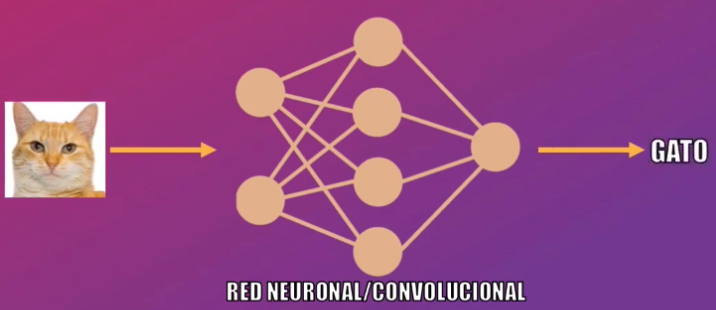

Una Red Neuronal debe aprender por sí sola a reconocer una diversidad de objetos dentro de imágenes y para ello necesitaremos una gran cantidad de imágenes -lease más de 10.000 imágenes de gatos, otras 10.000 de perros,…- para que la red pueda captar sus características únicas -de cada objeto- y a su vez, poder generalizarlo -esto es que pueda reconocer como gato tanto a un felino negro, uno blanco, un gato de frente, un gato de perfil, gato saltando, etc.-

Una imagen es una matriz de pixeles.

El valor de los pixeles va de 0 a 255, pero se normaliza para la red neuronal de 0 a 1. 

Para comenzar, la red toma como entrada los pixeles de una imagen. Si tenemos una imagen con apenas 28×28 pixeles de alto y ancho, eso equivale a  784 neuronas. Y eso es si sólo tenemos 1 color (escala de grises). Si tuviéramos una imagen a color, necesitaríamos 3 canales (red, green, blue) y entonces usaríamos 28x28x3 = 2352 neuronas de entrada. Esa es nuestra capa de entrada. Para continuar con el ejemplo, supondremos que utilizamos la imagen con 1 sólo color.


El padding básicamente consiste en añadir un borde de una cierta cantidad de pixeles a la imagen antes de aplicar la convolución, de tal manera que el resultado de la convolución tenga el mismo tamaño que la matriz de entrada sin el relleno.

**1.- Carga de los datos**


Se puede acceder a los datos de dos formas:


1.- A través de un set de datos de internet


2.- Cargando los datos (las imagenes) utilizando la clase ImageDataGenerator

Antes de alimentar la red, recuerda que como entrada nos conviene normalizar los valores. Los colores de los pixeles tienen valores que van de 0 a 255, haremos una transformación de cada pixel: “valor/255” y nos quedará siempre un valor entre 0 y 1.

**2.- Convolucion2D**

Ahora comienza el “procesado distintivo” de las CNN. Es decir, haremos las llamadas “convoluciones”: Estas consisten en tomar “grupos de pixeles cercanos” de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel. Ese kernel supongamos de tamaño 3×3 pixels “recorre” todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y genera una nueva matriz de salida, que en definitiva será nuestra nueva capa de neuronas ocultas.

En realidad, no aplicaremos 1 sólo kernel, si no que tendremos muchos kernel (su conjunto se llama filtros). Por ejemplo en esta primer convolución podríamos tener 32 filtros, con lo cual realmente obtendremos 32 matrices de salida (este conjunto se conoce como “feature mapping”), cada una de 28x28x1 dando un total del 25.088 neuronas para nuestra PRIMER CAPA OCULTA de neuronas. ¿No les parecen muchas para una imagen cuadrada de apenas 28 pixeles?

A medida que vamos desplazando el kernel y vamos obteniendo una “nueva imagen” filtrada por el kernel. En esta primer convolución y siguiendo con el ejemplo anterior, es como si obtuviéramos 32 “imágenes filtradas nuevas”. Estas imágenes nuevas lo que están “dibujando” son ciertas características de la imagen original. Esto ayudará en el futuro a poder distinguir un objeto de otro (por ej. gato ó perro).

La función de activación más utilizada para este tipo de redes neuronales es la llamada ReLu Rectifier Linear Unit  y consiste en f(x)=max(0,x).

**3.- Reduccion de los datos**

Ahora viene un paso en el que reduciremos la cantidad de neuronas antes de hacer una nueva convolución. ¿Por qué? Como vimos, a partir de nuestra imagen blanco y negro de 28x28px tenemos una primer capa de entrada de 784 neuronas y luego de la primer convolución obtenemos una capa oculta de 25.088 neuronas -que realmente son nuestros 32 mapas de características de 28×28-

Si hiciéramos una nueva convolución a partir de esta capa, el número de neuronas de la próxima capa se iría por las nubes (y ello implica mayor procesamiento)! Para reducir el tamaño de la próxima capa de neuronas haremos un proceso de subsampling en el que reduciremos el tamaño de nuestras imágenes filtradas pero en donde deberán prevalecer las características más importantes que detectó cada filtro. Hay diversos tipos de subsampling, yo comentaré el “más usado”: Max-Pooling

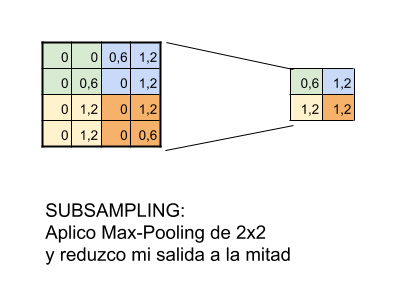

Supongamos que haremos Max-pooling de tamaño 2×2. Esto quiere decir que recorreremos cada una de nuestras 32 imágenes de características obtenidas anteriormente de 28x28px de izquierda-derecha, arriba-abajo PERO en vez de tomar de a 1 pixel, tomaremos de “2×2” (2 de alto por 2 de ancho = 4 pixeles) e iremos preservando el valor “más alto” de entre esos 4 pixeles (por eso lo de “Max”). 

En este caso, usando 2×2, la imagen resultante es reducida “a la mitad”y quedará de 14×14 pixeles. Luego de este proceso de subsamplig nos quedarán  32 imágenes de 14×14, pasando de haber tenido 25.088 neuronas a  6272, son bastantes menos y -en teoría- siguen almacenando la información más importante para detectar características deseadas.

La primer convolución es capaz de detectar características primitivas como lineas ó curvas. A medida que hagamos más capas con las convoluciones, los mapas de características serán capaces de reconocer formas más complejas, y el conjunto total de capas de convoluciones podrá “ver”.

Pues ahora deberemos hacer una Segunda convolución

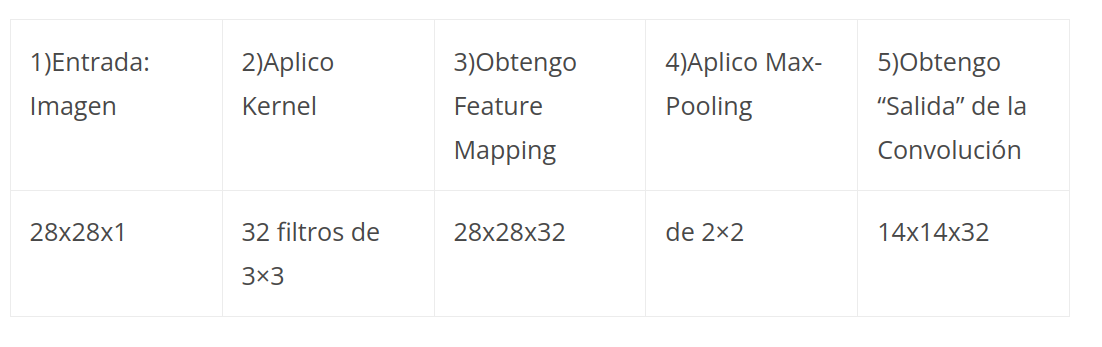

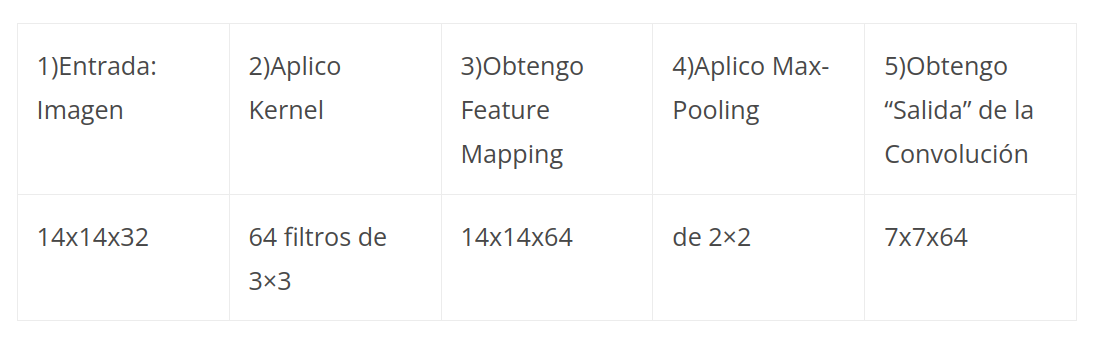

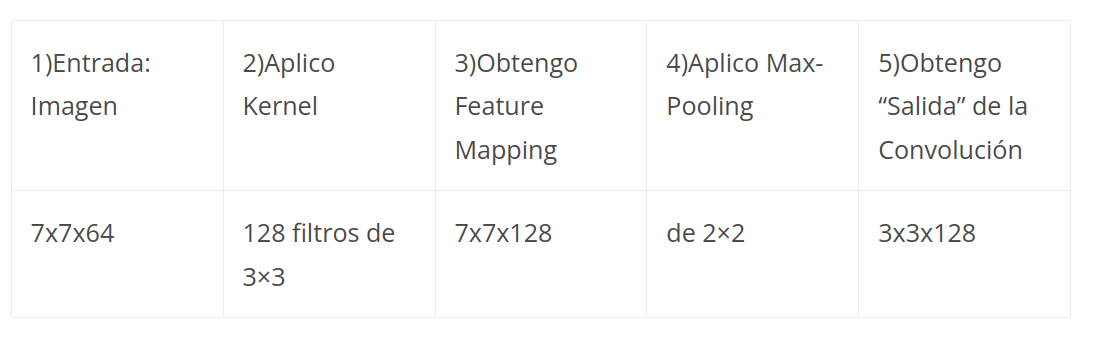


**4.- Flaten**

Para terminar, tomaremos la última capa oculta a la que hicimos subsampling, que se dice que es “tridimensional” por tomar la forma -en nuestro ejemplo- 3x3x128 (alto,ancho,mapas) y la “aplanamos”, esto es que deja de ser tridimensional, y pasa a ser una capa de neuronas “tradicionales”, de las que ya conocíamos. Por ejemplo, podríamos aplanar (y conectar) a una nueva capa oculta de 100 neuronas feedforward.

Entonces, a esta nueva capa oculta “tradicional”, le aplicamos una función llamada Softmax que conecta contra la capa de salida final que tendrá la cantidad de neuronas correspondientes con las clases que estamos clasificando. Si clasificamos perros y gatos, serán 2 neuronas. Si es el dataset Mnist numérico serán 10 neuronas de salida. Si clasificamos coches, aviones ó barcos serán 3, etc.

Las salidas al momento del entrenamiento tendrán el formato conocido como “one-hot-encoding” en el que para perros y gatos sera: [1,0] y [0,1], para coches, aviones ó barcos será [1,0,0]; [0,1,0];[0,0,1].

Y la función de Softmax se encarga de pasar a probabilidad (entre 0 y 1) a las neuronas de salida. Por ejemplo una salida [0,2 0,8] nos indica 20% probabilidades de que sea perro y 80% de que sea gato.

**5.- Dropout**

Dropout es un metodo que desactiva un numero de neuronas de una red neuronal de forma aleatoria. En cada iteración de la red neuronal dropout desactivara diferentes neuronas, las neuronas desactivadas no se toman en cuenta para el forwardpropagation ni para el backwardpropagation lo que obliga a las neuronas cercanas a no depender tanto de las neuronas desactivadas. Este metodo ayuda a reducir el overfitting ya que las neuronas cercanas suelen aprender patrones que se relacionan y estas relaciones pueden llegar a formar un patron muy especifico con los datos de entrenamiento, con dropout esta dependencia entre neuronas es menor en toda la red neuronal, de esta manera la neuronas necesitan trabajar mejor de forma solitaria y no depender tanto de las relaciones con las neuronas vecinas.

Dropout tiene un parametro que indica la probabilidad de que las neuronas se queden activadas, este paremetro toma valores de 0 a 1, 0.5 suele usarse por defecto indicando que la mitad de las neuronas se quedaran activadas, si los valores son cercanos a 0 dropout desactivara menos neuronas, si es cercano a 1 desactivara muchas más neuronas. Dropout solo se usa durante la fase de entrenamiento, en la fase de pruebas ninguna neurona se desactiva pero las escalamos on la probabilidad del dropout para compensar a las neuronas desactivadas durante la fase de entrenamiento.

Se puede establecer un dropout diferente por cada capa, dependiendo de lo que necesitemos en cada una, en las capas de entrada suele usarse un dropout muy alto (0.7) para mantener a la mayoria de neuronas activadas y en capas ocultas un dropout de (0.5).

En articulos que hablen sobre dropout y en la explicación oficial el parametro del metodo sirve para establecer el porcentaje de neuronas que se mantendran activadas tal y como lo explique pero en keras este parametro funciona de manera contraría, aquí indica el porcentaje de neuronas que se desactivaran en la red neuronal, si en teoria teniamos que el parametro del dropout de 0.7 es para mantener a la mayor parte de las neuronas activadas en keras tendriamos que poner un parametro de 0.3 para indicar lo mismo.